In [19]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.api import tsa
from matplotlib import font_manager as fm, rcParams


plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False   #这两行需要手动设置
%matplotlib inline

In [2]:
f = pd.read_csv('./user_balance_table.csv', parse_dates=['report_date'])
f[:1000:100]

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
100,1,2014-04-10,20151,20149,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
200,6,2014-08-20,1236,1236,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
300,8,2014-08-19,107947,0,107947,107947,0,107947,0,0,0,0,0,0,NaN,NaN,NaN,NaN
400,11,2014-08-31,1071728,1101956,123,0,0,0,30351,0,30351,0,30351,123,NaN,NaN,NaN,NaN
500,11,2014-05-03,50849,50843,6,0,0,0,0,0,0,0,0,6,NaN,NaN,NaN,NaN
600,23,2014-05-18,1034433,1034301,132,0,0,0,0,0,0,0,0,132,NaN,NaN,NaN,NaN
700,23,2014-03-11,8163583,8180394,305,0,0,0,17116,0,17116,17116,0,305,NaN,NaN,NaN,NaN
800,27,2014-07-02,1999267,1999040,227,0,0,0,0,0,0,0,0,227,NaN,NaN,NaN,NaN
900,27,2014-06-16,1995541,1995291,250,0,0,0,0,0,0,0,0,250,NaN,NaN,NaN,NaN


In [3]:
totaldf = f.groupby(['report_date'])['total_purchase_amt','total_redeem_amt'].sum()
totaldf.head()

,total_purchase_amt,total_redeem_amt
report_date,,
2013-07-01,32488348,5525022
2013-07-02,29037390,2554548
2013-07-03,27270770,5953867
2013-07-04,18321185,6410729
2013-07-05,11648749,2763587


In [4]:
totaldf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 427 entries, 2013-07-01 to 2014-08-31
Data columns (total 2 columns):
total_purchase_amt    427 non-null int64
total_redeem_amt      427 non-null int64
dtypes: int64(2)
memory usage: 10.0 KB


Text(0.5, 1.0, '日申购赎回量时序图')

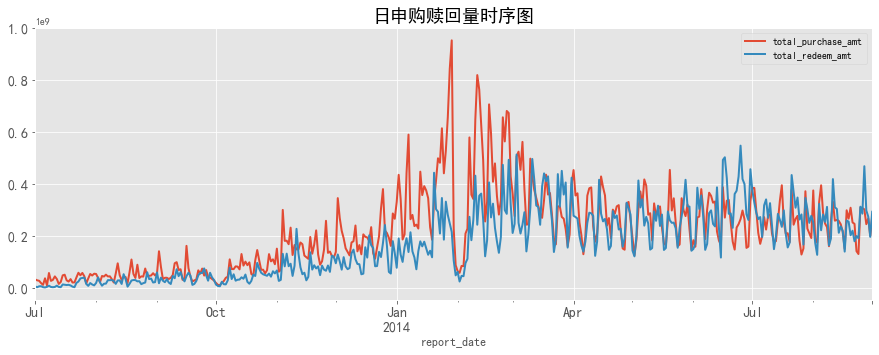

In [5]:
plt.style.use('ggplot')
fig = plt.subplots(figsize=(15,5))
ax1 = plt.subplot2grid((1,1),(0,0))
totaldf.plot(ax=ax1, alpha=2.0, linewidth=2, fontsize=14)
ax1.set_title('日申购赎回量时序图', fontsize=18)

In [6]:
t_purchase = tsa.stattools.adfuller(totaldf['total_purchase_amt'])
t_purchase

(-1.5898802926313549,
 0.4886749751375907,
 18,
 408,
 {'1%': -3.446479704252724,
  '5%': -2.8686500930967354,
  '10%': -2.5705574627547096},
 15960.28197033403)

In [7]:
t_redeem = tsa.stattools.adfuller(totaldf['total_redeem_amt'])
t_redeem

(-1.3724136798283337,
 0.59542758779495,
 13,
 413,
 {'1%': -3.4462831955497135,
  '5%': -2.8685636962704395,
  '10%': -2.5705114078759914},
 15816.780952766481)

In [8]:
#进行一阶差分
purchase_amt_diff = totaldf['total_purchase_amt'].diff(1)
purchase_amt_diff = purchase_amt_diff.fillna(0)
redeem_amt_diff = totaldf['total_redeem_amt'].diff(1)
redeem_amt_diff = redeem_amt_diff.fillna(0)

In [9]:
t_purchase_amt_diff = tsa.stattools.adfuller(purchase_amt_diff)
t_purchase_amt_diff

(-7.956533729495054,
 3.026793703144667e-12,
 18,
 408,
 {'1%': -3.446479704252724,
  '5%': -2.8686500930967354,
  '10%': -2.5705574627547096},
 15956.909450174286)

In [10]:
t_redeem_amt_diff = tsa.stattools.adfuller(redeem_amt_diff)
t_redeem_amt_diff

(-11.706274612707858,
 1.5262398566198373e-21,
 12,
 414,
 {'1%': -3.4462444670071046,
  '5%': -2.8685466682709975,
  '10%': -2.5705023309762187},
 15816.75911886961)

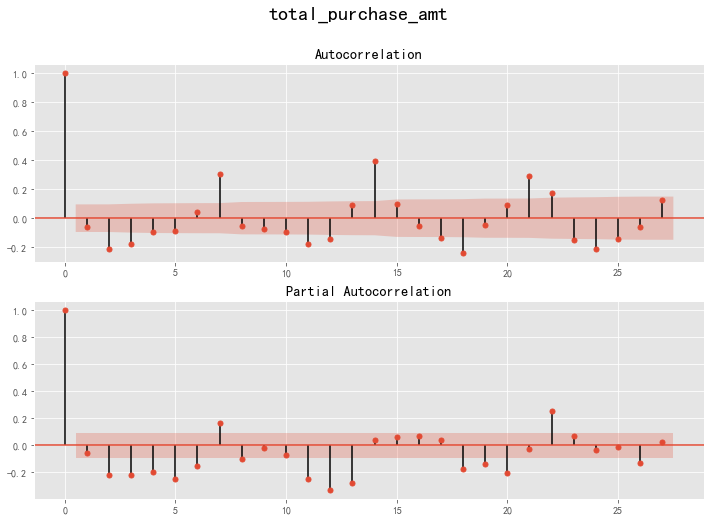

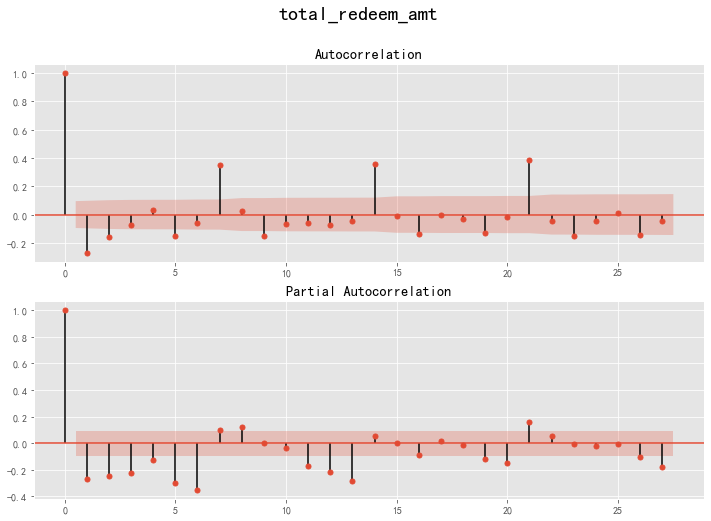

In [11]:
#分析一阶差分序列的acf 以及 pacf
import statsmodels.api as sm

def autocorrelation(timeseries, lags):
    fig = plt.figure(figsize=(12, 8))
    plt.suptitle(timeseries.name, fontsize=20)
    ax1 = fig.add_subplot(211)
    sm.graphics.tsa.plot_acf(timeseries, lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    sm.graphics.tsa.plot_pacf(timeseries, lags=lags, ax=ax2)
    plt.show()

autocorrelation(purchase_amt_diff, 27)
autocorrelation(redeem_amt_diff, 27)

<Figure size 432x288 with 0 Axes>

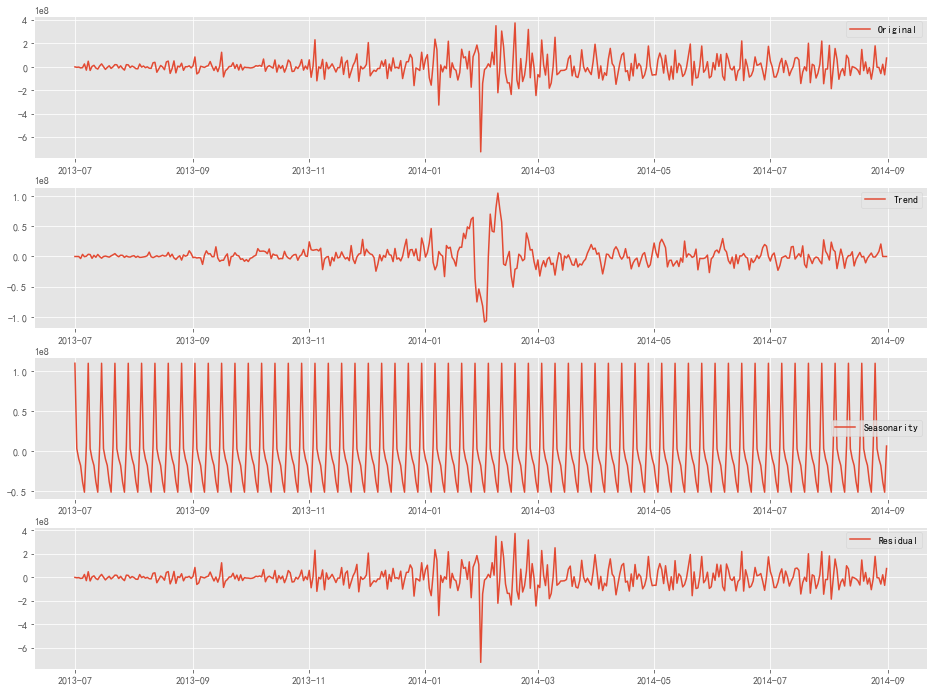

<Figure size 432x288 with 0 Axes>

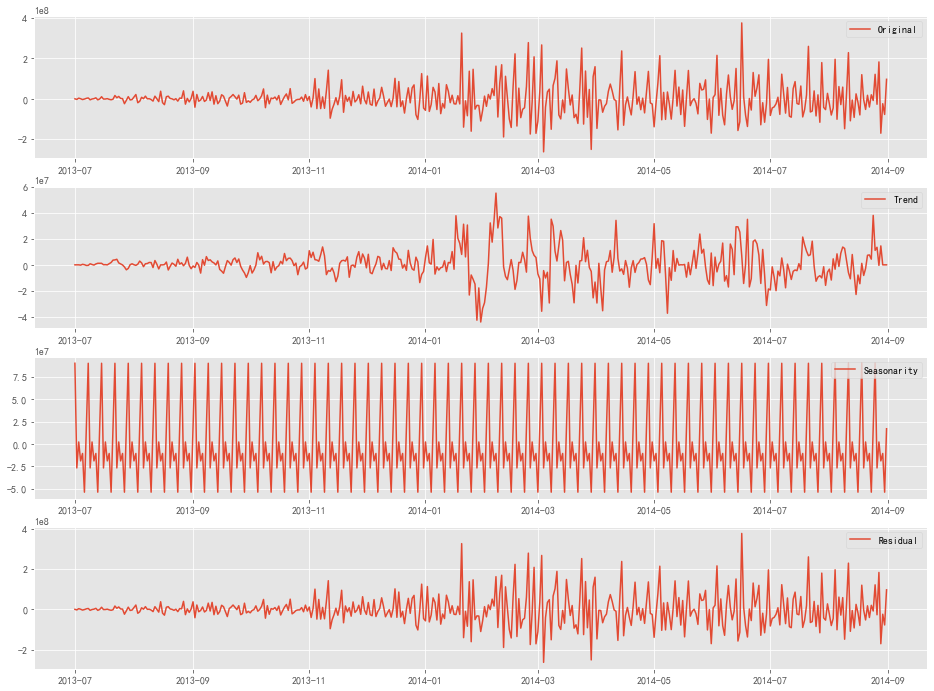

In [12]:
#进行STL分解
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

def decomposing(timeseries):
    decomposition = seasonal_decompose(timeseries)
    trend = decomposition.trend.fillna(0)
    seasonal = decomposition.seasonal.fillna(0)
    residual = decomposition.resid.fillna(0)
    
    plt.suptitle(timeseries.name, fontsize=20)
    plt.figure(figsize=(16,12))
    plt.subplot(411)
    plt.plot(timeseries, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonarity')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(timeseries, label='Residual')
    plt.legend(loc='best')
    plt.show()
    
    return trend, seasonal, residual
    

purchase_t, purchase_s, purchase_r = decomposing(purchase_amt_diff)
redeem_t, redeem_s, redeem_r = decomposing(redeem_amt_diff)

In [13]:
#进行分解序列的adf检验
t_purchase_t = tsa.stattools.adfuller(purchase_t)
print('purchase_t:',t_purchase_t)
t_purchase_r = tsa.stattools.adfuller(purchase_r)
print('purchase_r:',t_purchase_r)

purchase_t: (-6.015129593841274, 1.5401694579102317e-07, 15, 411, {'1%': -3.4463612216221775, '5%': -2.8685980017932917, '10%': -2.5705296947685605}, 14372.770335535484)
purchase_r: (-13.402198403589914, 4.543043726453889e-25, 15, 411, {'1%': -3.4463612216221775, '5%': -2.8685980017932917, '10%': -2.5705296947685605}, 15674.828224153933)


In [26]:
#AIC BIC
import statsmodels.api as sm

start = time.time()
purchase_t_evaluate = sm.tsa.arma_order_select_ic(purchase_t, ic=['aic', 'bic'], trend='nc', max_ar=8, max_ma=8)
print('trend AIC', purchase_t_evaluate.aic_min_order)
print('trend BIC', purchase_t_evaluate.bic_min_order)
end = time.time()
print(end-start)

C:\Users\TerryCai\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\TerryCai\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\TerryCai\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\TerryCai\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\TerryCai\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWar

trend AIC (8, 7)
trend BIC (8, 7)
792.6076786518097


In [ ]:
#进行分解序列的adf检验
t_redeem_t = tsa.stattools.adfuller(redeem_t)
print('purchase_t:',t_redeem_t)
t_redeem_r = tsa.stattools.adfuller(redeem_r)
print('purchase_r:',t_redeem_r)